# Proyek Analisis Data: Bike Sharing
- **Nama:** Rizal Pangestu
- **Email:** rizal.pangestu0601@mail.ugm.ac.id
- **ID Dicoding:** rizal-pangestu0601

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berbeda antara hari kerja (workingday) dan hari libur (holiday)?
- Bagaimana distribusi penggunaan sepeda berdasarkan jam (hr) dalam sehari? Apakah ada puncak penggunaan pada waktu tertentu (misalnya pagi atau sore)?
* Bagaimana perbedaan komposisi penggunaan sepeda antara pengguna terdaftar (registered) dan pengguna tidak terdaftar (casual)?
* Seberapa besar pengaruh kondisi cuaca (weathersit, temp, hum, windspeed) terhadap total penyewaan sepeda (cnt)?


## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install statmodel.api

ERROR: Could not find a version that satisfies the requirement statmodel.api (from versions: none)
ERROR: No matching distribution found for statmodel.api


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

#### Memuat Tabel day

In [5]:
day_df =pd.read_csv("https://raw.githubusercontent.com/rizalpangestu1/belajar-analisis-data-python-rizal-dicoding/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat Tabel hour

In [6]:
hour_df =pd.read_csv("https://raw.githubusercontent.com/rizalpangestu1/belajar-analisis-data-python-rizal-dicoding/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kolom instant berupa indeks rekaman atau baris data. Ini hanya digunakan untuk penomoran baris dan tidak memiliki arti analisis lebih lanjut.
- Kolom dteday adalah tanggal yang menunjukkan kapan data tersebut diambil. Bentuknya berupa string yang mewakili tanggal lengkap (misalnya, "2011-01-01").
- Kolom season adalah musim pada data diambil, berupa kategorikal:
  - 1: Musim semi
  - 2: Musim panas
  - 3: Musim gugur
  - 4: Musim dingin
- Kolom year adalah tahun saat data diambil berupa data kategorikal: (0: 2011, 1:2012)
- Kolom mnth berupa bulan pada data diambil, diwakili oleh angka 1 hingga 12, yang masing-masing mewakili Januari hingga Desember.
- Kolom hr adalah jam dalam sehari ketika data diambil, dalam format 24 jam (0-23). Kolom ini hanya ada di dataset **hour.csv**
- Kolom holiday menandakan apakah hari tersebut adalah hari libur nasional atau bukan.
  - 1: hari libur
  - 0: bukan hari libur
- Kolom working day menandakan apakah hari tersebut adalah hari kerja.
  - 1: bukan akhir pekan atau hari libur
  - 0: akhir pekan atau hari libur.
- Kolom weathersit menandakan cuaca yang nilainya berupa data kategorikal
  -  1: Cuaca cerah atau berawan sebagian.
  -  2: Cuaca berkabut, mendung, atau sedikit hujan.
  - 3: Hujan ringan, salju ringan, atau badai petir.
  - 4: Hujan deras, badai es, atau kabut tebal.
- Kolom temp menandakan suhu yang dinormalisasi, diukur dalam skala Celsius. Nilai sebenarnya dihitung dengan mengalikannya dengan 41 (maksimum normalisasi).
- Kolom hum menandakan tingkat kelembaban yang dinormalisasi, dihitung dengan membagai nilai kecepatan angin asli dengan 67 (maksimum normalisasi)
- Kolom casual menandakan jumlah pengguna sepeda kasual yang menyewa sepeda pada waktu tersebut. Pengguna kasual adalah mereka yang tidak memiliki langganan atau keanggotaan.
- Kolom registered menandakan jumlah pengguna sepeda yang terdaftar (memiliki langganan atau keanggotaan) yang menyewa sepeda pada waktu tersebut.
- Kolom cnt menandakan jumlah total penyewaan sepeda, termasuk pengguna kasual dan terdaftar. Kolom ini adalah penjumlahan dari casual dan registered.

### Assessing Data

#### Menilai Data day

Sebagai permulaan, perlu diperiksa tipe data data dari tiap kolom yang terdapat dalam day_df dengan method info().

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight**:
- Tidak terdapat missing value pada kelima belas kolom karena count data bernilai sama. Namun, harus diperiksa lebih lanjut apakah ada nilai-nilai yang mungkin secara statistik terlihat tidak sesuai (outliers atau nilai ekstrem).
- Kolom dteday bertipe object, yang kemungkinan besar merupakan string yang mewakili tanggal.

Berikut ini adalah kode pemeriksanaan eksistensi outlier pada kolom cnt, casual, dan registered.

In [8]:
# Kolom yang akan diperiksa outliers
columns_to_check = ['cnt', 'casual', 'registered']

for col in columns_to_check:
    # Menghitung Q1 dan Q3
    q25, q75 = np.percentile(day_df[col], 25), np.percentile(day_df[col], 75)
    iqr = q75 - q25

    # Menghitung batas outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Mendapatkan nilai outliers
    outliers = [x for x in day_df[col] if x < minimum or x > maximum]

    print(f"Outliers in {col}:")
    print(outliers)
    print(f"Number of outliers in {col}: {len(outliers)}")


Outliers in cnt:
[]
Number of outliers in cnt: 0
Outliers in casual:
[2355, 2282, 3065, 2418, 2521, 2397, 3155, 2469, 2301, 2347, 3252, 2795, 2846, 2541, 2496, 2622, 3410, 2704, 2855, 3283, 2557, 2795, 2494, 2708, 2963, 2634, 2657, 2551, 2562, 2355, 2544, 2345, 2827, 2352, 2613, 2570, 3160, 2512, 2454, 2589, 3031, 2806, 2643, 2290]
Number of outliers in casual: 44
Outliers in registered:
[]
Number of outliers in registered: 0


**Insight**: terdapat outlier pada kolom casual berjumlah 44.

Kolom cnt adalah penjumlahan dari kolom causal dan registered. Kolom ini merupakan jumlah total penyewaan sepeda, termasuk pengguna kasual dan terdaftar. Pada penilaian dataset ini, diperlukan verifikasi apakah kolom cnt ini memang merupakan penjumlahan dari kolom causal dan registered. Berikut ini adalah kodenya.

In [9]:
# Verify if 'cnt' is equal to the sum of 'casual' and 'registered'
day_df['sum_check'] = day_df['casual'] + day_df['registered'] # Changed day_pdf to day_df

# Check for any rows where 'cnt' does not equal the sum of 'casual' and 'registered'
inaccurate_values = day_df[day_df['cnt'] != day_df['sum_check']]

# Display the rows where the values are not aligning
inaccurate_values

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sum_check


**Insight**: Memang benar kolom cnt merupakan penjumlahan antara kolom registerd dan causal karena output di atas menunjukkan tidak ada data yang berbeda di dalam baris.

Langkah selanjutnya adalah melihat statistik deskriptif untuk penilaian tabel day lebih lanjut.

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sum_check
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,8714.000000


**Insight**:
Nilai mean, min, dan max dari kolom temp, atemp, hum, dan windspeed cukup aneh karena seharusnya nilai mereka berada direntang 0-ratusan. Hal ini karena data dinyatakan dalam bentuk yang dinormalisasi, yang bisa mengurangi interpretasi langsung dari nilainya.

Perlu dicek apakah terdapat data yang duplicated

In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**: tidak ada data yang terduplikasi.

Langkah selanjutnya adalah mengecek apakah kolom yang datanya berisi kategorikal seperti season, yr, mnth, dan weathersit memiliki encoding yang konsisten tanpa adanya anomali. Berikut adalah kodenya.

In [12]:
# Check unique values for categorical columns to ensure consistent encoding
inconsistent_values = {
    'season': day_df['season'].unique(),
    'yr': day_df['yr'].unique(),
    'mnth': day_df['mnth'].unique(),
    'weathersit': day_df['weathersit'].unique()
}

# Display the unique values for each categorical column
inconsistent_values

{'season': array([1, 2, 3, 4]),
 'yr': array([0, 1]),
 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'weathersit': array([2, 1, 3])}

**Insight**: Unique values di atas tidak mengindikasikan tidak adanya data yang inkonsistensi.

**Rangkuman untuk Cleaning Data day_df**:
- Kolom dteday bertipe object sehingga perlu diconvert ke date&time
- Terdapat outlier pada kolom causal.
- Perlu dikembalikan ke skala asli pada kolom temp, atemp, hum, dan windspeed.

#### Menilai Data hour

Perlu diperiksa tipe data dari tiap kolom yang terdapat dalam day_df dengan method info() serta statistik deskriptifnya.

In [13]:
hour_df.info()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:
* Kolom dteday yang bertipe object kemungkinan berisi string yang mewakili tanggal.
* Kolom temp, atemp, hum, dan windspeed dinyatakan dalam bentuk yang dinormalisasi, yang bisa mengurangi interpretasi langsung dari nilainya.
* Walaupun tidak ada data yang hilang, perlu diperiksa adanya outliers atau nilai yang sangat tinggi/rendah yang bisa mempengaruhi hasil analisis.

Berikut ini adalah kode pemeriksanaan eksistensi outlier pada kolom cnt, casual, dan registered.

In [14]:
# Kolom yang akan diperiksa outliers
columns_to_check = ['cnt', 'casual', 'registered']

for col in columns_to_check:
    # Menghitung Q1 dan Q3
    q25, q75 = np.percentile(hour_df[col], 25), np.percentile(hour_df[col], 75)
    iqr = q75 - q25

    # Menghitung batas outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Mendapatkan nilai outliers
    outliers = [x for x in hour_df[col] if x < minimum or x > maximum]

    print(f"Outliers in {col}:")
    print(outliers)
    print(f"Number of outliers in {col}: {len(outliers)}")


Outliers in cnt:
[651, 644, 712, 676, 734, 662, 782, 749, 713, 746, 651, 686, 690, 679, 685, 648, 721, 801, 750, 801, 729, 779, 649, 810, 801, 662, 957, 830, 686, 657, 664, 684, 644, 658, 654, 703, 681, 729, 757, 800, 684, 744, 759, 822, 698, 655, 643, 646, 692, 744, 704, 656, 738, 671, 678, 678, 660, 658, 681, 712, 676, 673, 781, 775, 677, 748, 776, 700, 819, 668, 649, 691, 654, 732, 709, 664, 702, 654, 653, 683, 664, 681, 743, 666, 729, 813, 704, 706, 643, 769, 680, 717, 710, 705, 732, 770, 779, 659, 678, 733, 650, 873, 846, 852, 868, 745, 812, 669, 704, 730, 672, 645, 785, 785, 719, 692, 798, 752, 653, 781, 710, 671, 839, 796, 693, 827, 785, 694, 668, 679, 647, 702, 644, 684, 686, 678, 644, 662, 665, 834, 822, 645, 710, 850, 790, 668, 724, 782, 681, 869, 813, 700, 793, 723, 651, 800, 831, 681, 653, 713, 857, 744, 671, 719, 867, 823, 653, 823, 693, 723, 673, 811, 795, 643, 691, 672, 646, 833, 791, 656, 900, 824, 687, 843, 804, 643, 705, 697, 747, 730, 646, 722, 689, 849, 872, 649, 87

**Insight**:
- Terdapat 505 data outlier pada kolom cnt
- Terdapat 11992 data outlier pada kolom casual
- Terdapat 680 data outlier pada kolom registered

Kolom cnt adalah penjumlahan dari kolom causal dan registered. Kolom ini merupakan jumlah total penyewaan sepeda, termasuk pengguna kasual dan terdaftar. Pada penilaian dataset ini, diperlukan verifikasi apakah kolom cnt ini memang merupakan penjumlahan dari kolom causal dan registered. Berikut ini adalah kodenya.

In [15]:
# Verify if 'cnt' is equal to the sum of 'casual' and 'registered'
hour_df['sum_check'] = hour_df['casual'] + hour_df['registered'] # Changed day_pdf to day_df

# Check for any rows where 'cnt' does not equal the sum of 'casual' and 'registered'
inaccurate_values = hour_df[hour_df['cnt'] != hour_df['sum_check']]

# Display the rows where the values are not aligning
inaccurate_values

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sum_check


**Insight**: Memang benar kolom cnt merupakan penjumlahan antara kolom registerd dan causal karena output di atas menunjukkan tidak ada data yang berbeda di dalam baris.

Perlu dicek apakah terdapat data yang duplicated.

In [16]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**: tidak ada data yang terduplikasi.

Langkah selanjutnya adalah mengecek apakah kolom yang datanya berisi kategorikal seperti season, yr, mnth, dan weathersit memiliki encoding yang konsisten tanpa adanya anomali. Berikut adalah kodenya.

In [17]:
# Check unique values for categorical columns to ensure consistent encoding
inconsistent_values = {
    'season': hour_df['season'].unique(),
    'yr': hour_df['yr'].unique(),
    'mnth': hour_df['mnth'].unique(),
    'weathersit': hour_df['weathersit'].unique()
}

# Display the unique values for each categorical column
inconsistent_values

{'season': array([1, 2, 3, 4]),
 'yr': array([0, 1]),
 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'weathersit': array([1, 2, 3, 4])}

**Insight**: Unique values di atas tidak mengindikasikan tidak adanya data yang inkonsistensi.

**Rangkuman untuk Cleaning Data hour_df:**
- Kolom dteday bertipe object sehingga perlu diconvert ke date&time
- Terdapat outlier pada kolom causal, cnt, dan registered.
- Perlu dikembalikan ke skala asli pada kolom temp, atemp, hum, dan windspeed.

### Cleaning Data

#### Membersihkan Data day_df

Masalah pertama yang akan ditangani adalah kolom dteday yang bertipe object. Hal ini perlu diconvert ke date&time. Berikut ini adalah kodenya.

In [18]:
datetime_columns = ['dteday']
day_df[datetime_columns] = day_df[datetime_columns].apply(pd.to_datetime)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  sum_check   731 non-null  

Masalah tipe data dteday telah diselesaikan.

Masalah selanjutnya adalah normalisasi data kolom temp, atemp, hum, dan windspeed. Pada cleaning data ini saya perlu mengembalikan skala kolom temp, atemp, hum, dan windspeed. Berikut ini adalah kodenya.

In [19]:
day_df['temp'] = day_df['temp'] * 41

In [20]:
day_df['atemp'] = day_df['atemp'] * 50

In [21]:
day_df['hum'] = day_df['hum'] * 100

In [22]:
day_df['windspeed'] = day_df['windspeed'] * 67

Kemudian dicek dengan menggunakan method describe()

In [23]:
day_df['temp'].describe()

,temp
count,731.000000
mean,20.310776
std,7.505091
min,2.424346
25%,13.820424
50%,20.431653
75%,26.872076
max,35.328347


In [24]:
day_df['atemp'].describe()

,atemp
count,731.000000
mean,23.717699
std,8.148059
min,3.953480
25%,16.892125
50%,24.336650
75%,30.430100
max,42.044800


In [25]:
day_df['hum'].describe()

,hum
count,731.000000
mean,62.789406
std,14.242910
min,0.000000
25%,52.000000
50%,62.666700
75%,73.020850
max,97.250000


In [26]:
day_df['windspeed'].describe()

,windspeed
count,731.000000
mean,12.762576
std,5.192357
min,1.500244
25%,9.041650
50%,12.125325
75%,15.625371
max,34.000021


Outlier pada data causal tidak dibersihkan karena perlu pertimbangkan dalam beberapa hal berikut.
1. Karena kolom-kolom ini merepresentasikan jumlah pengguna sepeda harian, sebuah outlier dapat menunjukkan kejadian khusus (misalnya, festival, anomali cuaca, atau hari libur) yang menyebabkan lonjakan atau penurunan tajam dalam penggunaan sepeda.
2. Untuk data jumlah pengguna harian, variasi yang tinggi adalah hal yang wajar karena dipengaruhi oleh faktor seperti hari kerja vs. akhir pekan, hari libur, dan kondisi cuaca. Oleh karena itu, outlier harus diinterpretasikan dengan hati-hati, dan tidak semua penyimpangan perlu dianggap sebagai masalah.
3. Walaupun mendeteksi outlier adalah hal yang bermanfaat, tidak selalu tepat untuk menghapusnya tanpa memahami konteksnya, karena outlier bisa mencerminkan variasi alami dalam perilaku pengguna sepeda, bukan kesalahan dalam data.

Oleh karena pertimbangan ini, data pada ketiga kolom tersebut tidak dibersihkan.

#### Membersihkan Tabel hour_df


Masalah pertama yang akan ditangani adalah kolom dteday yang bertipe object. Hal ini perlu diconvert ke date&time. Berikut ini adalah kodenya.

In [27]:
datetime_columns = ['dteday']
day_df[datetime_columns] = day_df[datetime_columns].apply(pd.to_datetime)

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  sum_check   731 non-null  

Masalah tipe data dteday telah diselesaikan.

Masalah selanjutnya adalah normalisasi data kolom temp, atemp, hum, dan windspeed. Pada cleaning data ini saya perlu mengembalikan skala kolom temp, atemp, hum, dan windspeed. Berikut ini adalah kodenya.

In [29]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [30]:
hour_df[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


Masalah skala data terselesaikan.

Outlier pada data causal, registered, dan cnt tidak dibersihkan karena perlu pertimbangkan dalam beberapa hal berikut.
1. Karena kolom-kolom ini merepresentasikan jumlah pengguna sepeda harian, sebuah outlier dapat menunjukkan kejadian khusus (misalnya, festival, anomali cuaca, atau hari libur) yang menyebabkan lonjakan atau penurunan tajam dalam penggunaan sepeda.
2. Untuk data jumlah pengguna harian, variasi yang tinggi adalah hal yang wajar karena dipengaruhi oleh faktor seperti hari kerja vs. akhir pekan, hari libur, dan kondisi cuaca. Oleh karena itu, outlier harus diinterpretasikan dengan hati-hati, dan tidak semua penyimpangan perlu dianggap sebagai masalah.
3. Walaupun mendeteksi outlier adalah hal yang bermanfaat, tidak selalu tepat untuk menghapusnya tanpa memahami konteksnya, karena outlier bisa mencerminkan variasi alami dalam perilaku pengguna sepeda, bukan kesalahan dalam data.
Oleh karena pertimbangan ini, data pada ketiga kolom tersebut tidak dibersihkan.

## Exploratory Data Analysis (EDA)

### Eksplorasi Tabel day_df

Eksplorasi data yang pertama adalah melihat statistik deskriptif dari tabel day_df.

In [31]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sum_check
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452,1937.211452


**Insight:**
1. cnt (jumlah total pengguna sepeda) memiliki nilai rata-rata 4504 pengguna per hari, dengan rentang dari 22 hingga 8714 pengguna.
2. casual (pengguna sepeda tidak terdaftar) memiliki rata-rata 848 pengguna per hari, sedangkan registered (pengguna terdaftar) lebih dominan dengan rata-rata 3656 pengguna per hari.
3. temp (temperatur) memiliki rata-rata 20.31°C dengan rentang antara 2.42°C hingga 35.33°C, yang menandakan variasi suhu yang cukup luas selama periode data.
4. atemp (temperatur yang terasa) memiliki nilai sedikit lebih tinggi dengan rata-rata 23.72°C, yang mungkin mencerminkan suhu yang dirasakan pengguna sepeda.
5. hum (kelembapan) bervariasi cukup luas, dengan rata-rata 62.79% dan rentang dari 0% hingga 97.25%, menunjukkan variasi kelembapan yang signifikan.
6. windspeed memiliki rata-rata 12.76 km/h, dengan rentang dari 1.50 km/h hingga 34 km/h. Variasi kecepatan angin dapat mempengaruhi kenyamanan bersepeda.


Untuk melihat pola distribusi dari data, digunakan histogram.

array([[<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

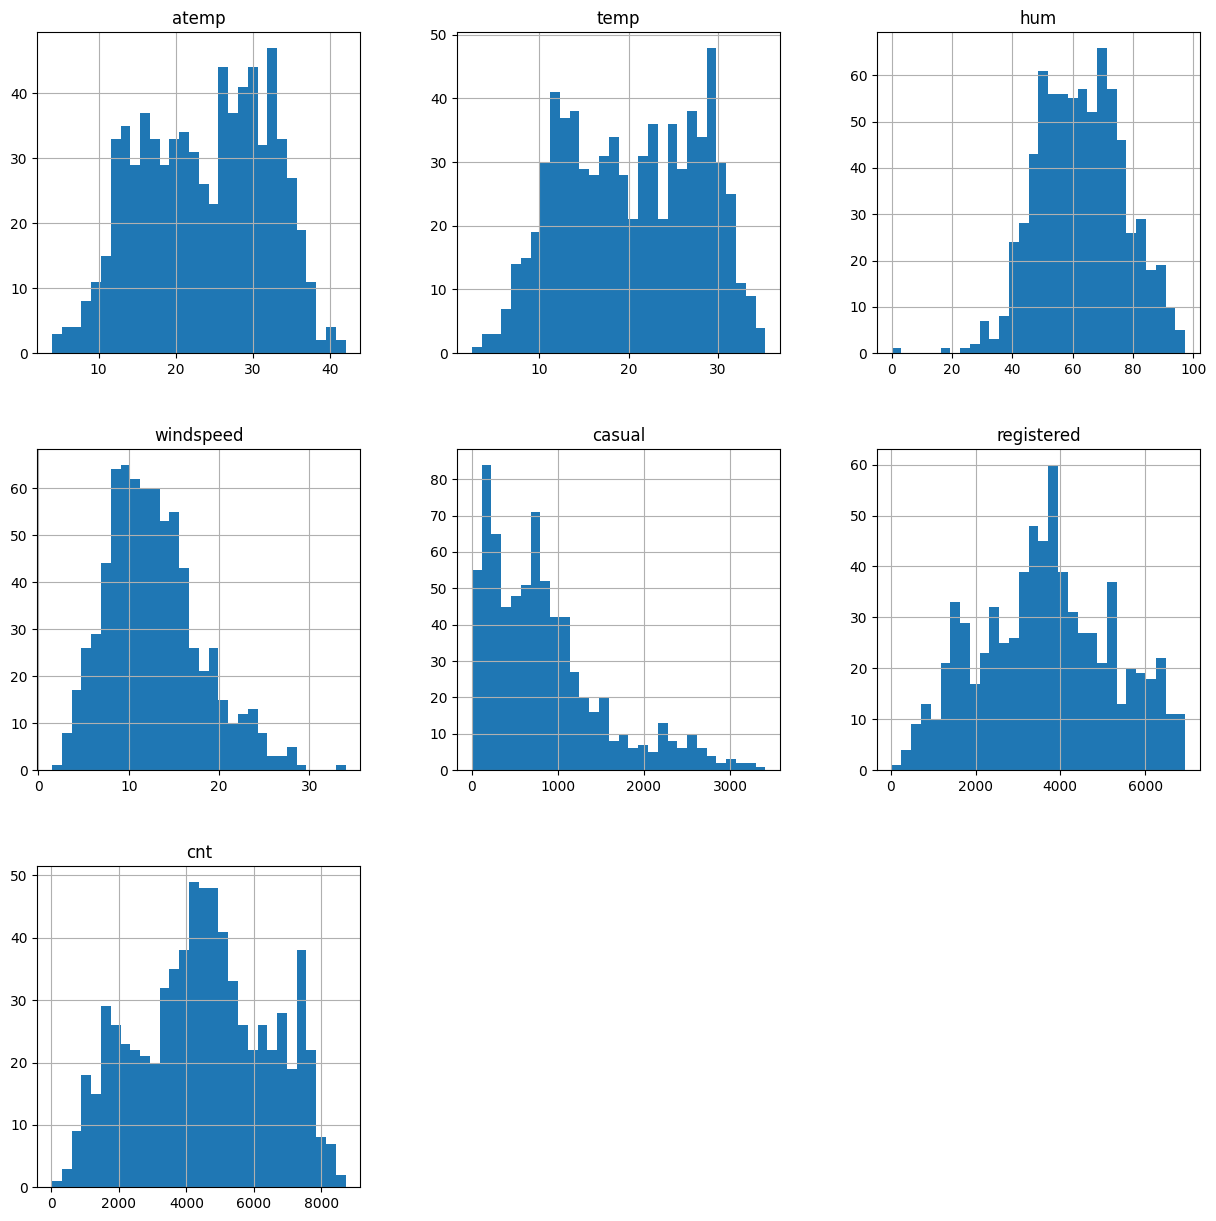

In [32]:
day_df[['atemp', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].hist(figsize=(15, 15), bins=30)

**Insight**:
1. atemp (Feels Like Temperature) dan temp (Temperature): Distribusi kedua variabel ini memiliki pola yang hampir sama dan tampak simetris.

2. Distribusi kelembapan (hum) berbentuk hampir normal dengan puncak di sekitar 60-70%.

3. windspeed (Kecepatan Angin): Bentuk distribusi yang skewed ke kanan ini menunjukkan bahwa kondisi bersepeda umumnya lebih nyaman karena angin yang tidak terlalu kencang.

4. casual (Pengguna Tidak Terdaftar) dan registered (Pengguna Terdaftar):
- Distribusi pengguna tidak terdaftar (casual) sangat skewed ke kanan, yang menunjukkan bahwa jumlah hari dengan sedikit pengguna tidak terdaftar sangat tinggi, sedangkan jumlah hari dengan banyak pengguna tidak terdaftar sangat rendah.
- Sebaliknya, distribusi pengguna terdaftar (registered) mendekati bentuk normal dengan puncak di sekitar 4000 pengguna per hari. Ini menunjukkan bahwa pengguna terdaftar lebih sering menggunakan sepeda secara konsisten, dengan fluktuasi yang lebih rendah dibandingkan pengguna tidak terdaftar.

5. cnt (Total Pengguna Sepeda): Distribusi total pengguna sepeda (cnt) berbentuk seperti distribusi normal dengan puncak di sekitar 4000-5000 pengguna per hari.

Kemudian, saya mengeksplorasi jumlah pengguna sepeda, baik yang total, tanpa registrasi, dan yang teregistrasi, berdasarkan hari libur atau tidak. berikut adalah kodenya

In [33]:
day_df.groupby(by="holiday").agg({
    "cnt": ["mean", "min", "max", "std"],
    "casual": ["mean", "min", "max", "std"],
    "registered": ["mean", "min", "max", "std"]
})

cnt                                casual             \
                mean   min   max          std         mean  min   max   
holiday                                                                 
0        4527.104225    22  8714  1929.013947   841.771831    2  3410   
1        3735.000000  1000  7403  2103.350660  1064.714286  117  3065   

                      registered                          
                std         mean  min   max          std  
holiday                                                   
0        680.528529  3685.332394   20  6946  1553.704431  
1        860.046809  2670.285714  573  5172  1492.860246

Saya perlu mengubah kode kategorikal 0 (tidak saat hari libur) dan 1 (saat hari libur) agar stakeholder mengetahui komunikasi dari data yang saya sampaikan dengan kode berikut.

In [34]:
day_df['holiday'] = day_df['holiday'].replace({0: 'No Holiday', 1: 'Holiday'})

In [35]:
day_df.groupby(by="holiday").agg({
    "cnt": ["mean", "min", "max", "std"],
    "casual": ["mean", "min", "max", "std"],
    "registered": ["mean", "min", "max", "std"]
})

cnt                                casual             \
                   mean   min   max          std         mean  min   max   
holiday                                                                    
Holiday     3735.000000  1000  7403  2103.350660  1064.714286  117  3065   
No Holiday  4527.104225    22  8714  1929.013947   841.771831    2  3410   

                         registered                          
                   std         mean  min   max          std  
holiday                                                      
Holiday     860.046809  2670.285714  573  5172  1492.860246  
No Holiday  680.528529  3685.332394   20  6946  1553.704431

**Insight**:
1. *Jumlah Pengguna Sepeda*
- Rata-rata Pengguna Sepeda: Rata-rata jumlah pengguna sepeda pada hari libur lebih rendah (3735) dibandingkan dengan hari biasa (4527). Ini menunjukkan bahwa pada hari kerja, penggunaan sepeda lebih tinggi.
- Variasi Pengguna Sepeda: Standar deviasi jumlah pengguna sepeda pada hari libur (2103) lebih tinggi dibandingkan dengan hari biasa (1929), yang menunjukkan fluktuasi yang lebih besar dalam penggunaan sepeda pada hari libur.
- Rentang Pengguna Sepeda: Pada hari libur, jumlah pengguna sepeda berkisar dari 1000 hingga 7403 pengguna, sementara pada hari biasa, jumlahnya berkisar dari 22 hingga 8714 pengguna. Rentang yang lebih luas pada hari biasa menunjukkan variasi yang lebih signifikan dalam penggunaan sepeda.
2. *Pengguna Sepeda Tidak Terdaftar*
- Rata-rata Pengguna Tidak Terdaftar: Pengguna tidak terdaftar lebih banyak menggunakan sepeda pada hari libur, dengan rata-rata 1064 pengguna, dibandingkan dengan hari biasa yang memiliki rata-rata 841 pengguna. Hal ini mengindikasikan bahwa pengguna tidak terdaftar cenderung menggunakan sepeda lebih banyak saat hari libur.
- Variasi Pengguna Tidak Terdaftar: Standar deviasi pada hari libur lebih tinggi (860) dibandingkan hari biasa (680), yang berarti variasi penggunaan oleh pengguna tidak terdaftar lebih besar pada hari libur.
- Rentang Pengguna Tidak Terdaftar: Pada hari libur, pengguna tidak terdaftar berkisar antara 117 hingga 3065 pengguna, sedangkan pada hari biasa berkisar dari 2 hingga 3410 pengguna. Hal ini menunjukkan variasi yang signifikan dalam penggunaan sepeda oleh pengguna tidak terdaftar.

*3. Pengguna Terdaftar*
- Rata-rata Pengguna Terdaftar: Pada hari biasa, pengguna terdaftar jauh lebih banyak menggunakan sepeda (rata-rata 3685 pengguna) dibandingkan pada hari libur (2670 pengguna). Ini menunjukkan bahwa pengguna terdaftar lebih aktif pada hari kerja.
- Variasi Pengguna Terdaftar: Standar deviasi pada hari libur adalah 1492, sementara pada hari biasa 1554, menunjukkan bahwa fluktuasi penggunaan sepeda oleh pengguna terdaftar cukup mirip antara hari libur dan hari biasa.
- Rentang Pengguna Terdaftar: Jumlah pengguna terdaftar pada hari libur berkisar dari 573 hingga 5172 pengguna. Pada hari biasa, rentang ini lebih luas, yaitu dari 20 hingga 6946 pengguna.




Kemudian, saya mengeksplorasi jumlah pengguna sepeda, baik yang total, tanpa registrasi, dan yang teregistrasi, berdasarkan musim. berikut adalah kodenya

In [36]:
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3:'Autumn', 4:'Winter'})
day_df.groupby(by="season").agg({
    "cnt": ["mean", "min", "max", "std"],
    "casual": ["mean", "min", "max", "std"],
    "registered": ["mean", "min", "max", "std"]
})

cnt                                casual             \
               mean   min   max          std         mean  min   max   
season                                                                 
Autumn  5644.303191  1115  8714  1459.800381  1202.611702  118  3160   
Spring  2604.132597   431  7836  1399.942119   334.928177    9  3155   
Summer  4992.331522   795  8362  1695.977235  1106.097826  120  3410   
Winter  4728.162921    22  8555  1699.615261   729.112360    2  3031   

                     registered                          
               std         mean  min   max          std  
season                                                   
Autumn  595.975032  4441.691489  889  6917  1304.626949  
Spring  387.655561  2269.204420  416  5315  1200.269751  
Summer  737.590829  3886.233696  674  6456  1353.375628  
Winter  606.318118  3999.050562   20  6946  1444.782557

**Insight:**
1. ***Rata-rata Penggunaan Sepeda per Musim (cnt):***
- Musim Gugur (Autumn) memiliki rata-rata pengguna sepeda harian tertinggi (5644), dengan penggunaan mencapai maksimum 8714 pengguna dalam sehari. Hal ini mungkin menunjukkan kondisi cuaca yang optimal untuk bersepeda.
- Musim Panas (Summer) berada di posisi kedua dengan rata-rata penggunaan sepeda harian sebesar 4992 dan puncak penggunaan 8362 pengguna dalam satu hari.
- Musim Dingin (Winter) dan Musim Semi (Spring) memiliki rata-rata penggunaan yang lebih rendah, dengan 4728 dan 2604 pengguna sepeda per hari masing-masing. Variasi yang lebih rendah dalam penggunaan sepeda di musim semi bisa disebabkan oleh cuaca yang lebih tidak stabil atau lebih sedikit hari yang cocok untuk bersepeda.
2. ***Pengguna Tidak Terdaftar (casual):***
- Autumn dan Summer memiliki jumlah rata-rata pengguna tidak terdaftar tertinggi, masing-masing sebesar 1202 dan 1106 pengguna. Ini menunjukkan bahwa orang cenderung menggunakan sepeda secara rekreasi atau tanpa berlangganan pada musim-musim tersebut.
- Musim Semi (Spring) memiliki rata-rata pengguna tidak terdaftar terendah (335), menunjukkan bahwa lebih sedikit pengguna kasual yang bersepeda di musim ini, mungkin karena cuaca yang kurang mendukung.
- Standar deviasi tertinggi di musim panas (737.59) dan musim gugur (595.98) menunjukkan variasi penggunaan sepeda kasual yang lebih besar dibandingkan musim lainnya.
3. ***Pengguna Terdaftar (registered):***
- Pengguna terdaftar lebih mendominasi penggunaan sepeda, terutama di Musim Gugur (Autumn) dengan rata-rata 4441 pengguna per hari, serta maksimum pengguna harian mencapai 6917.
- Musim Dingin (Winter) dan Musim Panas (Summer) memiliki jumlah pengguna terdaftar yang hampir seimbang, dengan masing-masing rata-rata 3999 dan 3886 pengguna.
- Musim Semi (Spring) tetap memiliki rata-rata pengguna terdaftar yang lebih rendah (2269), yang sejalan dengan rendahnya jumlah pengguna kasual di musim ini.

### Eksplorasi Tabel hour_df


In [37]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sum_check
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,281.000000


**Insights:**
1. casual (Pengguna tidak terdaftar): Rata-rata sekitar 35.68 pengguna per jam, dengan standar deviasi tinggi (49.31), menandakan variasi penggunaan yang besar. Rentangnya dari 0 hingga 367 pengguna per jam.
2. registered (Pengguna terdaftar): Rata-rata sekitar 153.79 pengguna per jam, dengan standar deviasi 151.36, menunjukkan distribusi yang lebih stabil dibandingkan casual. Rentangnya dari 0 hingga 886 pengguna per jam.
3. cnt (Total penyewaan sepeda): Rata-rata sekitar 189.46 per jam, dengan rentang dari 1 hingga 977 pengguna. Standar deviasi 181.39 menunjukkan variabilitas yang besar dalam penggunaan sepeda per jam.
Distribusi Total Penggunaan:
4. Median penggunaan sepeda (cnt) per jam adalah 142, dengan kuartil bawah 40 dan kuartil atas 281. Ini menunjukkan distribusi yang cukup tersebar dengan beberapa puncak penggunaan yang signifikan.

array([[<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

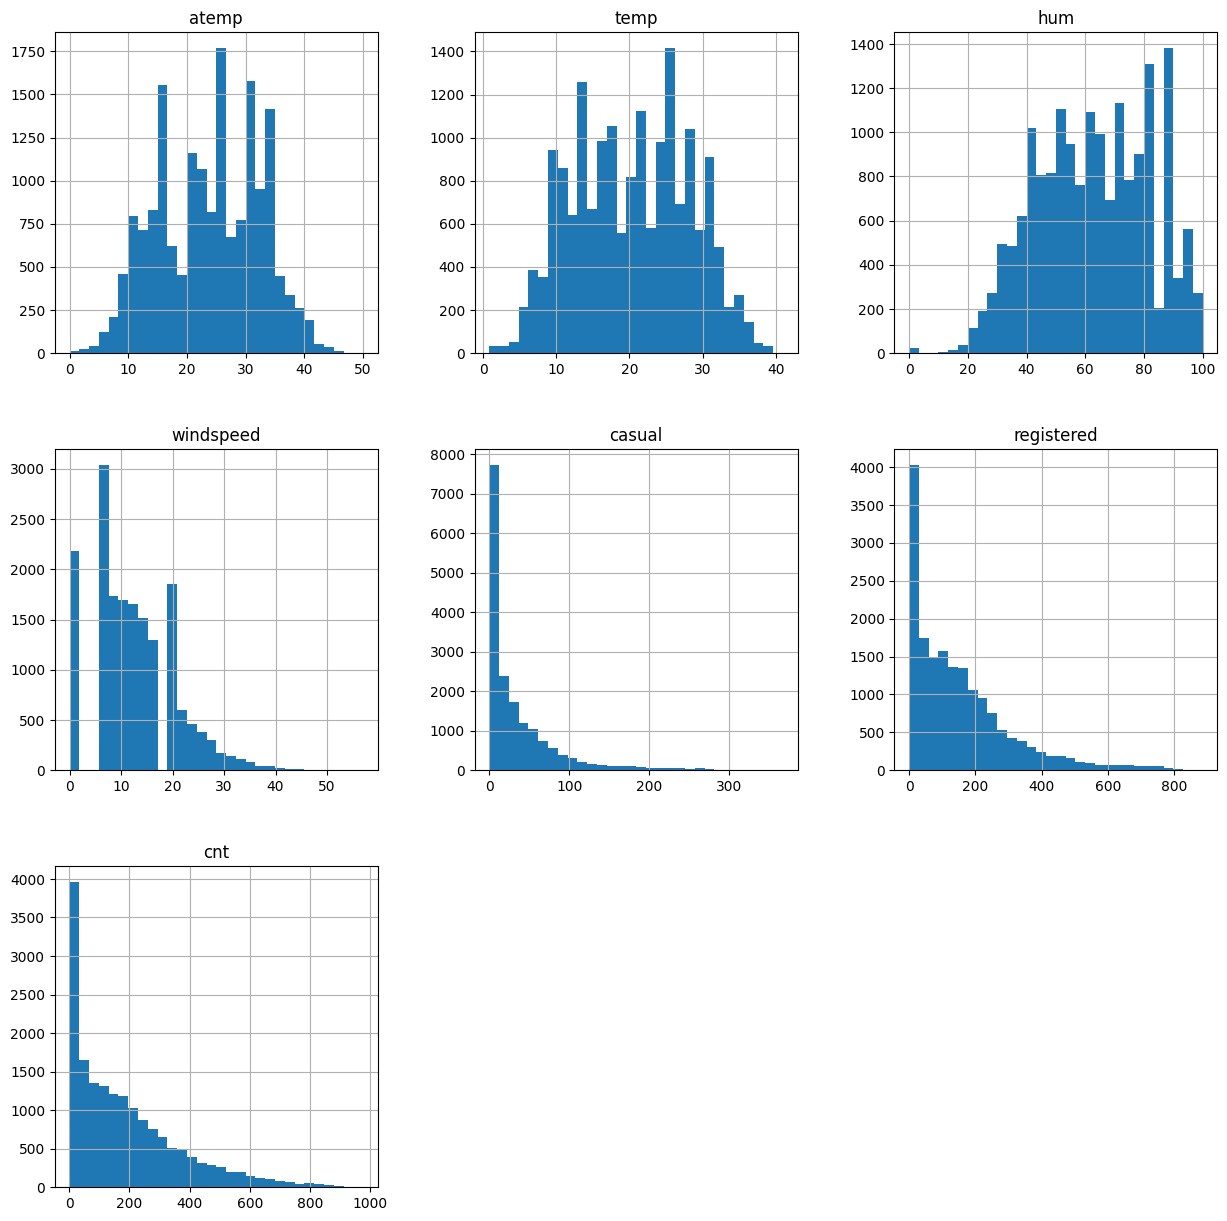

In [38]:
hour_df[['atemp', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].hist(figsize=(15, 15), bins=30)

**Insights:**
1. Distribusi atemp berbentuk simetris dan hampir normal, dengan dua puncak yang cukup jelas.
2. Distribusi suhu (temp) memiliki pola yang serupa dengan atemp, yang wajar karena keduanya saling berkaitan.
3. Distribusi kelembapan (hum) mendekati normal dengan sedikit skew ke kanan.
4. Distribusi windspeed sangat skewed ke kanan, dengan sebagian besar nilai berada di bawah 20 km/h.
5. Distribusi casual sangat skewed ke kanan, dengan sebagian besar nilai berada di bawah 100 pengguna per jam.
6. Distribusi registered juga skewed ke kanan, tetapi dengan nilai yang lebih tinggi dibandingkan casual.
7. Distribusi cnt (jumlah total penyewaan sepeda per jam) sangat skewed ke kanan, mirip dengan distribusi casual dan registered.

In [39]:
hour_df['holiday']=hour_df['holiday'].replace({0: 'No Holiday', 1: 'Holiday'})
hour_df.groupby(by="holiday").agg({
    "cnt": ["mean", "min", "max", "std"],
    "casual": ["mean", "min", "max", "std"],
    "registered": ["mean", "min", "max", "std"]
})

cnt                          casual                      \
                 mean min  max         std       mean min  max        std   
holiday                                                                     
Holiday     156.87000   1  712  156.757478  44.718000   0  272  59.041360   
No Holiday  190.42858   1  977  181.981435  35.408377   0  367  48.963745   

            registered                       
                  mean min  max         std  
holiday                                      
Holiday     112.152000   0  601  111.369094  
No Holiday  155.020203   0  886  152.210779

**Insights**:
1. Pada hari libur, rata-rata total pengguna sepeda adalah 156,87.
2. Pada hari non-libur, rata-rata total pengguna sepeda meningkat menjadi 190,43.
3. Pada hari libur, rata-rata pengguna kasual adalah 44,72, sedangkan pada hari non-libur rata-rata ini adalah 35,41. Ini menunjukkan bahwa lebih banyak pengguna kasual menggunakan sepeda pada hari libur, kemungkinan untuk aktivitas rekreasi.
4. ada hari libur, rata-rata pengguna terdaftar adalah 112,15, sementara pada hari non-libur meningkat menjadi 155,02. Hal ini menunjukkan bahwa pengguna terdaftar lebih aktif pada hari non-libur, kemungkinan karena alasan komuter rutin.

In [40]:
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3:'Autumn', 4:'Winter'})
hour_df.groupby(by="season").agg({
    "cnt": ["mean", "min", "max", "std"],
    "casual": ["mean", "min", "max", "std"],
    "registered": ["mean", "min", "max", "std"]
})

cnt                          casual                      \
              mean min  max         std       mean min  max        std   
season                                                                   
Autumn  236.016237   1  977  197.711630  50.287144   0  350  51.751916   
Spring  111.114569   1  801  119.224010  14.290901   0  367  27.463006   
Summer  208.344069   1  957  188.362473  46.160581   0  361  57.455803   
Winter  198.868856   1  967  182.967972  30.666824   0  362  46.034058   

        registered                       
              mean min  max         std  
season                                   
Autumn  185.729093   0  886  166.430156  
Spring   96.823668   0  681  104.347605  
Summer  162.183488   0  782  152.751493  
Winter  168.202032   0  876  157.559340

**Insights:**
1. Autumn (Musim Gugur)
  - Rata-rata Total Pengguna (cnt): 236,02 pengguna, tertinggi dibandingkan musim lainnya.
  - Min dan Maksimum: Jumlah pengguna minimum 1 dan maksimum mencapai 977
  - Variabilitas (std): 197,71, menunjukkan variabilitas yang sangat tinggi.
  - Pengguna Kasual (casual): Rata-rata 50,29 pengguna, dengan variabilitas 51,75, cukup tinggi.
  - Pengguna Terdaftar (registered): Rata-rata 185,73, dengan standar deviasi 166,43. Pengguna terdaftar lebih dominan pada musim ini.

2. Spring (Musim Semi)
  - Rata-rata Total Pengguna (cnt): 111,11, terendah dibanding musim lain.
  - Min dan Maksimum: Jumlah pengguna minimum 1 dan maksimum 801.
  - Variabilitas (std): 119,22, lebih rendah dari musim lainnya.
  - Pengguna Kasual (casual): Rata-rata 14,29, dengan variabilitas 27,46. Penggunaan kasual sangat rendah.
  - Pengguna Terdaftar (registered): Rata-rata 96,82 pengguna, dengan standar deviasi 104,35. Variabilitas cukup besar, namun lebih rendah dibanding musim lain.

3. Summer (Musim Panas)
  - Rata-rata Total Pengguna (cnt): 208,34, lebih tinggi daripada musim semi dan musim dingin.
  - Min dan Maksimum: Jumlah pengguna minimum 1 dan maksimum mencapai 957.
  - Variabilitas (std): 188,36, menunjukkan fluktuasi yang cukup tinggi
  - Pengguna Kasual (casual): Rata-rata 46,16 pengguna, dengan standar deviasi 57,46, mengindikasikan variasi yang besar.
  - Pengguna Terdaftar (registered): Rata-rata 162,18, dengan variabilitas yang cukup tinggi (152,75).

4. Winter (Musim Dingin)
  - Rata-rata Total Pengguna (cnt): 198,87, lebih tinggi dari musim semi namun lebih rendah dari autumn dan summer.
  - Min dan Maksimum: Jumlah pengguna minimum 1 dan maksimum 967.
  - Variabilitas (std): 182,97, menunjukkan variasi yang signifikan.
  - Pengguna Kasual (casual): Rata-rata 30,67, dengan variabilitas 46,03.
  - Pengguna Terdaftar (registered): Rata-rata 168,20, dengan standar deviasi 157,56.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berbeda antara hari kerja (workingday) dan hari libur (holiday)?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


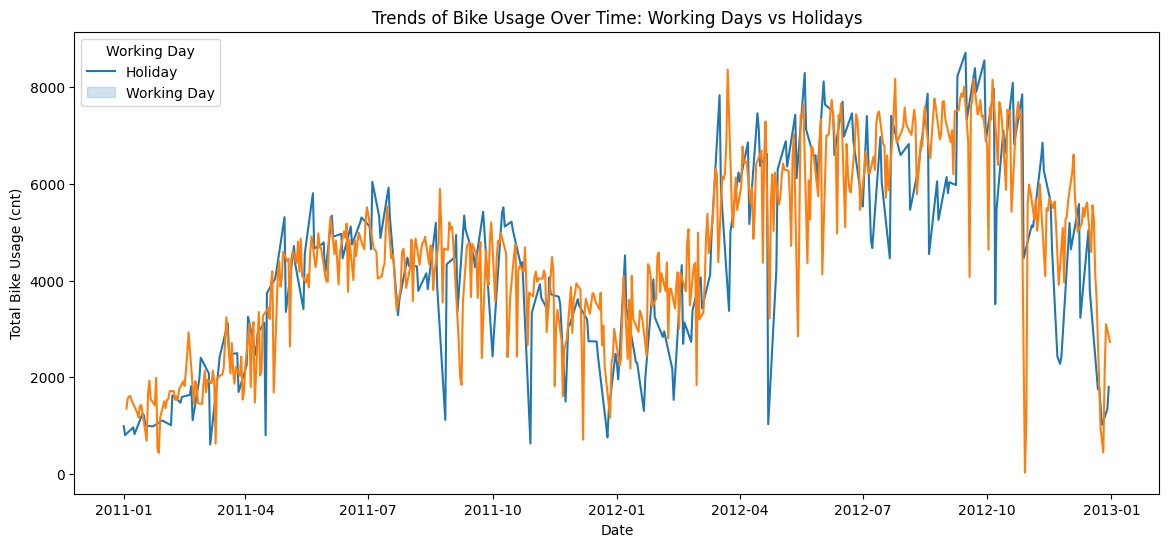

In [41]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='dteday', y='cnt', hue='workingday', data=day_df)

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Total Bike Usage (cnt)')
plt.title('Trends of Bike Usage Over Time: Working Days vs Holidays')
plt.legend(title='Working Day', labels=['Holiday', 'Working Day'])


**Insights**:
1. Secara keseluruhan, terlihat bahwa penggunaan sepeda meningkat dari awal tahun 2011 hingga pertengahan 2012. Puncak penggunaan sepeda terjadi selama musim panas di tahun 2012, sebelum mulai menurun kembali pada akhir tahun 2012.
2. Pada hari kerja, penggunaan sepeda cenderung lebih tinggi dan stabil dibandingkan hari libur. Hal ini bisa disebabkan oleh rutinitas komuter yang terjadi pada hari kerja. Selain itu, fluktuasi penggunaan sepeda pada hari libur lebih tidak teratur dibandingkan hari kerja. Ini dapat dikaitkan dengan variasi aktivitas rekreasi atau liburan yang berbeda-beda setiap hari libur.
3. Pada hari libur, terlihat fluktuasi yang lebih besar dan penggunaan sepeda cenderung lebih rendah secara umum. Peningkatan penggunaan sepeda pada hari libur tampaknya tidak sepadat hari kerja dan seringkali terjadi secara sporadis. Selain itu, pada hari kerja, meskipun terdapat fluktuasi, tren lebih konsisten dan stabil karena pengguna cenderung menggunakan sepeda untuk keperluan rutin seperti bekerja atau bersekolah.

### Pertanyaan 2: Bagaimana distribusi penggunaan sepeda berdasarkan jam (hr) dalam sehari? Apakah ada puncak penggunaan pada waktu tertentu (misalnya pagi atau sore)?

<ipython-input-42-27af2a4492c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hourly_usage, palette='YlOrRd')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a leng

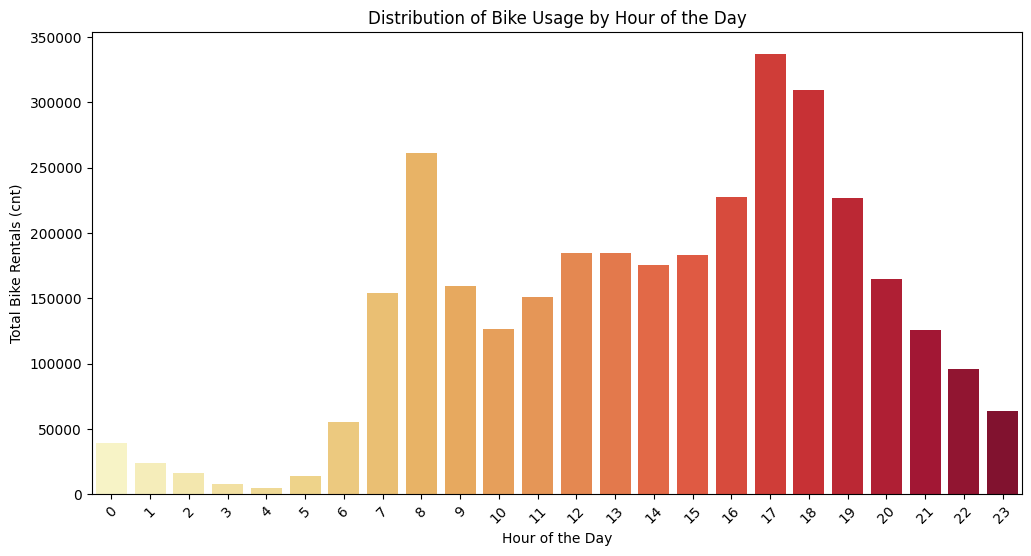

In [42]:
hourly_usage = hour_df.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_usage, palette='YlOrRd')

plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals (cnt)')
plt.title('Distribution of Bike Usage by Hour of the Day')
plt.xticks(rotation=45)
plt.show()

**Insights:**
1. Penggunaan sepeda menunjukkan dua puncak utama, yaitu pada pukul 08:00 dan 17:00 - 18:00. Puncak pagi (sekitar 08:00): Penggunaan sepeda mencapai hampir 300.000 sewa, menandakan waktu di mana banyak orang berangkat kerja atau sekolah. Puncak sore (sekitar 17:00 - 18:00): Penggunaan sepeda mencapai puncak tertinggi, sekitar 350.000 sewa, yang menunjukkan waktu di mana orang pulang dari aktivitas harian mereka.
2. Setelah puncak pagi, penggunaan sepeda menurun secara bertahap dari pukul 09:00 hingga 15:00, dengan aktivitas yang relatif stabil di kisaran 150.000 - 200.000 sewa per jam. Penurunan ini kemungkinan disebabkan oleh orang-orang yang sudah sampai di tujuan mereka, seperti tempat kerja atau sekolah.
3. Setelah pukul 18:00, penggunaan sepeda menurun tajam, namun masih cukup signifikan hingga pukul 21:00. Aktivitas penggunaan sepeda pada malam hari ini mungkin terkait dengan aktivitas sosial, olahraga, atau pulang kerja yang lebih larut.

<ipython-input-180-6caedf1079c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='casual', data=hourly_usage, palette='YlGnBu')


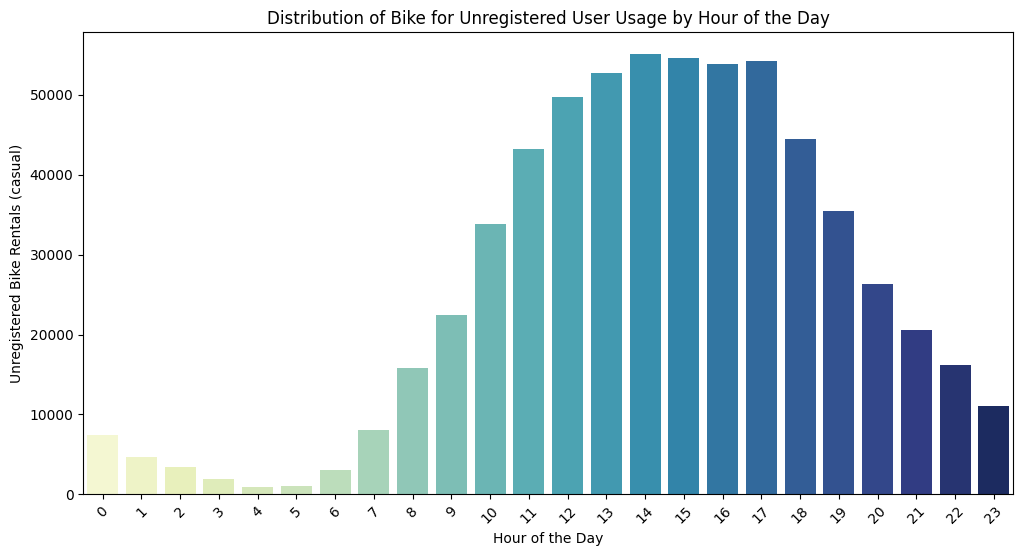

In [ ]:
hourly_usage = hour_df.groupby('hr')['casual'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='casual', data=hourly_usage, palette='YlGnBu')

plt.xlabel('Hour of the Day')
plt.ylabel('Unregistered Bike Rentals (casual)')
plt.title('Distribution of Bike for Unregistered User Usage by Hour of the Day')
plt.xticks(rotation=45)
plt.show()

**Insights:**
1. Penggunaan sepeda oleh pengguna yang tidak terdaftar memuncak pada jam 10:00 hingga 17:00, dengan jumlah sewa tertinggi sekitar 55.000 per jam. Puncak ini menunjukkan bahwa pengguna kasual lebih aktif pada siang hingga sore hari, kemungkinan besar untuk kegiatan rekreasi atau perjalanan non-komuter.
2. Aktivitas penggunaan sepeda sangat rendah antara pukul 00:00 hingga 08:00. Jumlah sewa kurang dari 10.000 per jam, menunjukkan sedikit aktivitas sepeda oleh pengguna tidak terdaftar pada waktu ini. Penggunaan mulai meningkat secara bertahap dari pukul 08:00, dan mencapai puncaknya sekitar pukul 10:00.
3. Penggunaan sepeda relatif stabil pada jam 10:00 hingga 16:00, dengan variasi yang kecil. Ini menunjukkan bahwa pengguna tidak terdaftar lebih memilih waktu ini untuk menggunakan sepeda, mungkin karena kenyamanan atau cuaca yang lebih baik pada siang hari.

<ipython-input-125-e28042055837>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='registered', data=hourly_usage, palette='BuPu')


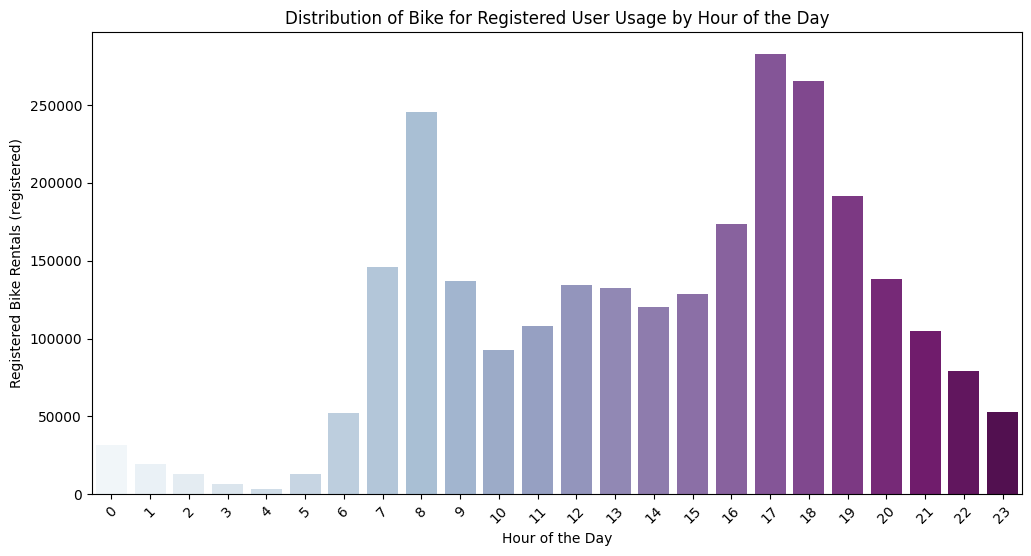

In [ ]:
hourly_usage = hour_df.groupby('hr')['registered'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='registered', data=hourly_usage, palette='BuPu')

plt.xlabel('Hour of the Day')
plt.ylabel('Registered Bike Rentals (registered)')
plt.title('Distribution of Bike for Registered User Usage by Hour of the Day')
plt.xticks(rotation=45)
plt.show()

**Insights:**
1. Puncak pertama terjadi sekitar pukul 08:00, dengan jumlah sewa mencapai lebih dari 250.000 per jam. Ini menunjukkan waktu berangkat kerja atau sekolah yang tinggi. Puncak kedua terjadi sekitar pukul 17:00 hingga 18:00, dengan jumlah sewa sedikit lebih tinggi daripada puncak pagi, mencapai sekitar 270.000 per jam. Ini adalah waktu saat banyak pengguna pulang dari tempat kerja atau sekolah.
2. Berbeda dengan pengguna tidak terdaftar, yang aktivitasnya mencapai puncak pada siang hari, pengguna terdaftar menunjukkan pola puncak di pagi dan sore hari, sesuai dengan jam-jam komuter kerja atau sekolah.
Penggunaan sepeda menurun drastis setelah puncak pagi dan sore, menunjukkan bahwa pola penggunaan sangat terkait dengan rutinitas harian.

### Pertanyaan 3: Bagaimana perbedaan komposisi penggunaan sepeda antara pengguna terdaftar (registered) dan pengguna tidak terdaftar (casual)?

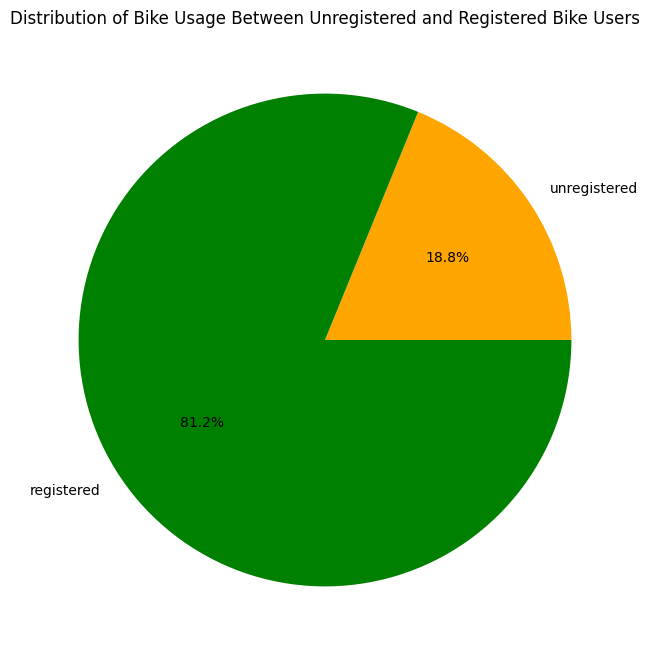

In [43]:
usage_counts = [day_df['casual'].sum(), day_df['registered'].sum()]

plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=['unregistered', 'registered'], autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('Distribution of Bike Usage Between Unregistered and Registered Bike Users')
plt.show()

**Insights:**
1. Pengguna terdaftar menyumbang 81,2% dari total penggunaan sepeda.
Hal ini menunjukkan bahwa mayoritas besar dari total penggunaan sepeda berasal dari pengguna yang memiliki langganan atau akun terdaftar. Ini bisa dikarenakan pengguna terdaftar lebih sering menggunakan sepeda untuk perjalanan rutin, seperti pergi dan pulang kerja atau sekolah.
2. Pengguna tidak terdaftar menyumbang 18,8% dari total penggunaan sepeda.
Proporsi ini jauh lebih kecil dibandingkan pengguna terdaftar, menunjukkan bahwa sepeda mungkin digunakan secara lebih jarang oleh mereka yang tidak memiliki akun terdaftar. Pengguna ini kemungkinan menggunakan sepeda untuk keperluan yang lebih sporadis atau rekreasi, yang tidak memerlukan langganan jangka panjang.

### Pertanyaan 4: Seberapa besar pengaruh kondisi cuaca (weathersit, temp, hum, windspeed) terhadap total penyewaan sepeda (cnt)?

Berikut ini adalah statistik deskriptif dari variabel dependen (cnt) dan beberapa variabel independen (weathersit, temp, hum, windspeed).

In [44]:
day_df[['cnt', 'weathersit', 'temp', 'hum', 'windspeed']].describe()

,cnt,weathersit,temp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,4504.348837,1.395349,20.310776,62.789406,12.762576
std,1937.211452,0.544894,7.505091,14.242910,5.192357
min,22.000000,1.000000,2.424346,0.000000,1.500244
25%,3152.000000,1.000000,13.820424,52.000000,9.041650
50%,4548.000000,1.000000,20.431653,62.666700,12.125325
75%,5956.000000,2.000000,26.872076,73.020850,15.625371
max,8714.000000,3.000000,35.328347,97.250000,34.000021


Langkah pertama adalah mentransformasikan data cnt (total pengguna sepeda) ke dalam bentuk logaritma agar range antara variabel cuaca tidak terlalu jauh.

In [45]:
cnt_log = np.log(day_df['cnt'])
day_df['cnt'] = cnt_log

Kemudian, dicari koefisien estimasi hubungan antara variabel independen terhadap dependen dengan menggunakan Ordinary Least Square (OLS).

In [46]:
import statsmodels.api as sm

independent_var = day_df[['weathersit', 'temp', 'hum', 'windspeed']]
dependent_var = day_df['cnt']

# Add a constant to the features for the intercept in the model
independent_var_with_constant = sm.add_constant(independent_var)

# Build the OLS (Ordinary Least Squares) regression model
model = sm.OLS(dependent_var, independent_var_with_constant).fit()

# Print the summary of the regression model to analyze the effect of weather variables on bike rentals
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     154.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.58e-95
Time:                        10:46:51   Log-Likelihood:                -417.81
No. Observations:                 731   AIC:                             845.6
Df Residuals:                     726   BIC:                             868.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1958      0.102     80.265      0.000       7.995       8.396
weathersit    -0.1922      0.038     -5.027      0.000      -0.267      -0.117
temp           0.0444      0.002     20.075      0.000       0.040       0.049
hum           -0.0047      0.002     -3.090      0.002      -0.008      -0.002
windspeed     -0.0199      0.003     -6.089      0.000      -0.026      -0.013
==============================================================================
Omnibus:                      395.285   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7756.131
Skew:                          -1.985   Prob(JB):                         0.00
Kurtosis:                      18.456   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Ekstrak tabel koefisien dari ringkasan model
coeff_table = model_summary.tables[1]

# Buat DataFrame dari tabel koefisien
coeff_df = pd.DataFrame(coeff_table.data[1:], columns=coeff_table.data[0])

# Buat tabel yang rapi menggunakan pandas
coeff_df.columns = ['Variable', 'Coef', 'Std Err', 't', 'P>|t|', '[0.025', '0.975]']
coeff_df.set_index('Variable', inplace=True)

# Menampilkan tabel yang rapi dengan pandas
coeff_df


,Coef,Std Err,t,P>|t|,[0.025,0.975]
Variable,,,,,,
const,8.1958,0.102,80.265,0.000,7.995,8.396
weathersit,-0.1922,0.038,-5.027,0.000,-0.267,-0.117
temp,0.0444,0.002,20.075,0.000,0.040,0.049
hum,-0.0047,0.002,-3.090,0.002,-0.008,-0.002
windspeed,-0.0199,0.003,-6.089,0.000,-0.026,-0.013


**Insights:**
1. Weathersit (Kondisi Cuaca) berkoefisien = -0.1922 yang enunjukkan bahwa kondisi cuaca memiliki pengaruh negatif terhadap jumlah pengguna sepeda. Ketika kondisi cuaca berubah menjadi lebih buruk, jumlah pengguna sepeda berkurang rata-rata sebesar 0.1922 dan signifikan secara statistik karena p-value lebih kecil dari 0.05.
2. Temp (Suhu) berkoefisien = 0.0444 yang menunjukkan bahwa suhu memiliki pengaruh positif terhadap jumlah pengguna sepeda. Ketika suhu meningkat, jumlah pengguna sepeda juga cenderung meningkat serta signifikan secara statistik karena p-value kurang dari 0.05.
3. Hum (Kelembapan) berkoefisien = -0.4650 yang menunjukkan bahwa kelembapan memiliki efek negatif terhadap jumlah pengguna sepeda. Semakin tinggi kelembapan, jumlah pengguna sepeda cenderung berkurang dan signifikan secara statistik karena p-value kurang dari 0.05.
4. Windspeed (Kecepatan Angin) berkoefisien = -0.0199 yang menunjukkan bahwa kecepatan angin juga memiliki pengaruh negatif terhadap jumlah pengguna sepeda. Semakin tinggi kecepatan angin, jumlah pengguna sepeda cenderung menurun dan signifikan secara statistik karena p-value kurang dari 0.05.

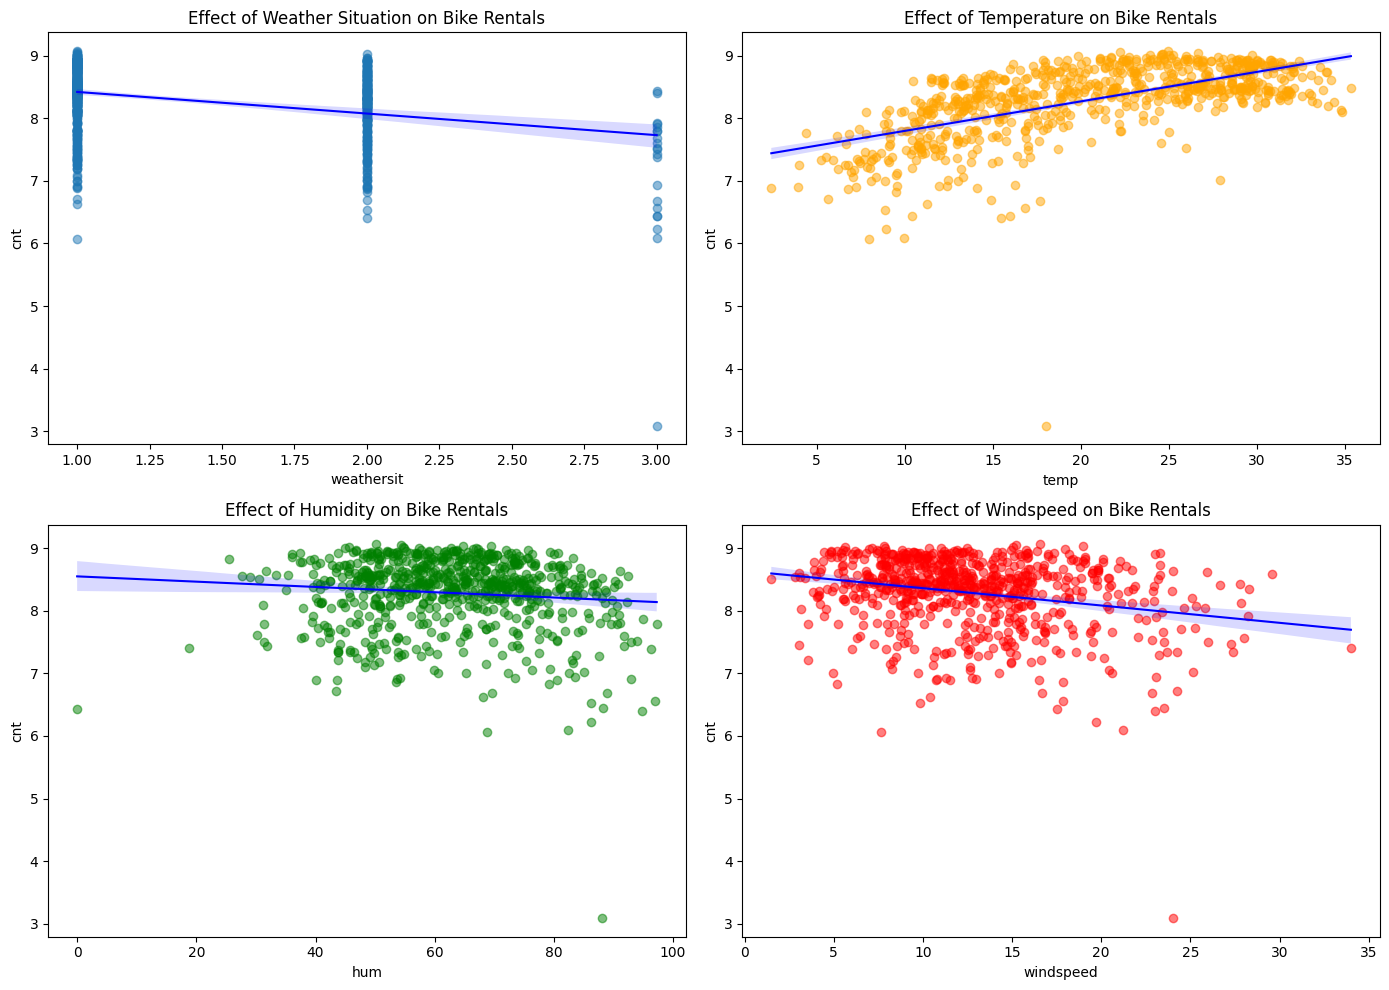

In [48]:
# Create scatter plots to visualize the relationship between weather conditions and total bike rentals
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for 'weathersit'
axes[0, 0].scatter(day_df['weathersit'], day_df['cnt'], alpha=0.5)
axes[0, 0].set_xlabel('Weathersit')
axes[0, 0].set_ylabel('Total Bike Rentals (cnt)')
axes[0, 0].set_title('Effect of Weather Situation on Bike Rentals')
sns.regplot(x='weathersit', y='cnt', data=day_df, scatter=False, ax=axes[0, 0], color='blue', line_kws={"linewidth": 1.5}) # Changed ax to axes[0, 0]

# Scatter plot for 'temp'
axes[0, 1].scatter(day_df['temp'], day_df['cnt'], alpha=0.5, color='orange')
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('Total Bike Rentals (cnt)')
axes[0, 1].set_title('Effect of Temperature on Bike Rentals')
sns.regplot(x='temp', y='cnt', data=day_df, scatter=False, ax=axes[0, 1], color='blue', line_kws={"linewidth": 1.5})

# Scatter plot for 'hum'
axes[1, 0].scatter(day_df['hum'], day_df['cnt'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('Humidity')
axes[1, 0].set_ylabel('Total Bike Rentals (cnt)')
axes[1, 0].set_title('Effect of Humidity on Bike Rentals')
sns.regplot(x='hum', y='cnt', data=day_df, scatter=False, ax=axes[1, 0], color='blue', line_kws={"linewidth": 1.5})

# Scatter plot for 'windspeed'
axes[1, 1].scatter(day_df['windspeed'], day_df['cnt'], alpha=0.5, color='red')
axes[1, 1].set_xlabel('Windspeed')
axes[1, 1].set_ylabel('Total Bike Rentals (cnt)')
axes[1, 1].set_title('Effect of Windspeed on Bike Rentals')
sns.regplot(x='windspeed', y='cnt', data=day_df, scatter=False, ax=axes[1, 1], color='blue', line_kws={"linewidth": 1.5})

# Adjust layout
plt.tight_layout()
plt.show()

**Insights:**
1. Variabel yang paling berpengaruh positif terhadap penggunaan sepeda adalah suhu (temp). Ketika suhu meningkat, lebih banyak pengguna sepeda yang terlihat.
2. Variabel yang memberikan dampak negatif terhadap penggunaan sepeda adalah kondisi cuaca (weathersit), kelembapan (hum), dan kecepatan angin (windspeed). Cuaca yang lebih buruk, kelembapan yang lebih tinggi, dan kecepatan angin yang lebih besar semuanya mengurangi jumlah pengguna sepeda.

## Conclusion

1. Hari kerja memiliki jumlah penggunaan sepeda yang lebih tinggi dan stabil dibandingkan hari libur, kemungkinan karena aktivitas rutin yang dilakukan. Sementara itu, hari libur memiliki pola penggunaan yang lebih tidak teratur, dengan penggunaan sepeda yang lebih rendah secara keseluruhan dan fluktuasi yang lebih besar.
2. Waktu sibuk penggunaan sepeda terjadi dua kali dalam sehari, yaitu pada jam sibuk pagi sekitar pukul 08:00 dan jam sibuk sore sekitar pukul 17:00 - 18:00. Hal ini konsisten dengan pola perjalanan komuter di pagi hari menuju kantor atau sekolah dan perjalanan pulang di sore hari.
3. Mayoritas penggunaan sepeda (81,2%) berasal dari pengguna terdaftar sehingga perusahaan sepeda ini dapat berfokus pada layanan kepada mereka.
4. Suhu memiliki pengaruh positif terbesar terhadap penggunaan sepeda, dengan jumlah pengguna yang meningkat seiring kenaikan suhu. Sebaliknya, kondisi cuaca yang lebih buruk, kelembapan yang tinggi, dan kecepatan angin yang lebih besar berdampak negatif pada penggunaan sepeda, menyebabkan penurunan jumlah pengguna.

In [49]:
day_df.to_csv("day_df_cleaned.csv", index=False)

In [50]:
hour_df.to_csv("hour_df_cleaned.csv", index=False)